<a href="https://colab.research.google.com/github/uruba24/Regression_Modeling_Project/blob/main/Regression_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Dictonary**

1. `Symboling` : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. associated with a particular car model.
2. `normalized-losses` : Normalized losses refer to the average loss payment per insured vehicle
3. `make` : Name of car company
4. `fuel-type` : Car fuel type
5. `aspiration` : Aspiration used in the car
6. `num-of-doors` : Number of doors in a car
7. `body-style` : Shape and layout of the car's exterior of the car
8. `drive-wheels` : Type of drive wheel
9. `engine-location` : Location of the car engine
10. `wheel-base` : Weelbase of the car
11. `length` : Length of the car
12. `width` : Width of the car
13. `height` : Height of the car
14. `curb-weight` : The weight of a car without occupants or baggage
15. `engine-type` : Type of engine
16. `num-of-cylinders` : Cylinders placed in the car
17. `engine-size` : Size of the car engine
18. `fuel-system` : Fuel system of the car
19. `bore` : Boreratio of the car
20. `stroke` : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. `compression-ratio` : Compression ratio of car
22. `horsepower` : Horsepower of the car
23. `peak-rpm` : The peak revolutions per minute of an engine of the car
24. `city-mpg` : Car's mileage in the city
25. `highway-mpg` : Car's mileage on highway
26. `price` : Price of the car

# **Tasks**

The following are the broad tasks to be performed on the project:

- Load the data into your code
- Perform EDA and a detailed analysis on the data.
- Prepare the data preprocessing pipelies.
- Apply the required preprocessing techniques on the data.
- Keep 20% of the data aside as test data.
- Apply different machine learning techniques.
- Report the following metrics using different regression models on the test data:
     - MSE
     - R2-score

- Prepare a brief report documenting the key steps involved along with the reasoning behind different decisions that you made in these steps.

# **Notes**

Write textual comments in your code wherever appropriate.

Note: As a data scientist, you might need to make several decisions while exploring the data feel free to do that and mention the same in the report.
Be as innovative and creative as possible. Visualize data wherever required.

**Task 1 - Load the data into your code and import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/cars_price.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


**Task 2 - Analyse the data using following functions:**

- head(),
- tail(),
- info(),
- describe() and
- isnull().sum(). Report your findings.

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


In [4]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018
30329,NaN,65,toyota,gas,NaN,four,hatchback,fwd,front,102.4,...,122.0,mpfi,NaN,3.54,8.7,NaN,4200,27.0,32.0,9988


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [6]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
data.isnull().sum()

,0
symboling,3044
normalized-losses,3036
make,3102
fuel-type,3021
aspiration,2975
num-of-doors,3009
body-style,3004
drive-wheels,3115
engine-location,2978
wheel-base,3066


**Report of My Findings**
1. Dataset has 26 columns
2. Dataset has 30330 entries
3. Dataset contains following datatypes: float and object
4. Dataset contains many null values ineach column.

**Task 3 - Data Cleaning**

- Check and remove the duplicate rows
- Check the unique values of all categorical columns
- Check the data types of all columns and ensure they are correct (convert where required)
- Impute the missing values

In [8]:
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {data[column].unique()}")


Unique values in normalized-losses: [nan '?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '161' '153' '125' '128' '103' '122' '108' '194' '231' '119' '154' '74'
 '186' '83' '102' '89' '87' '77' '91' '168' '134' '65' '197' '90' '94'
 '256' '95' '142']
Unique values in make: ['alfa-romero' 'audi' nan 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Unique values in fuel-type: ['gas' nan 'diesel']
Unique values in aspiration: ['std' nan 'turbo']
Unique values in num-of-doors: ['two' 'four' nan '?']
Unique values in body-style: ['convertible' 'hatchback' 'sedan' nan 'wagon' 'hardtop']
Unique values in drive-wheels: ['rwd' 'fwd' '4wd' nan]
Unique values in engine-location: ['front' nan 'rear']
Unique values in engine-type: ['dohc' nan 'ohcv' 'ohc' 'l' 'roto

In [10]:
# Convert numeric-like strings to floats
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')
data['bore'] = pd.to_numeric(data['bore'], errors='coerce')
data['stroke'] = pd.to_numeric(data['stroke'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25874 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          22961 non-null  float64
 1   normalized-losses  18293 non-null  float64
 2   make               22905 non-null  object 
 3   fuel-type          22982 non-null  object 
 4   aspiration         23031 non-null  object 
 5   num-of-doors       22971 non-null  object 
 6   body-style         22999 non-null  object 
 7   drive-wheels       22884 non-null  object 
 8   engine-location    23024 non-null  object 
 9   wheel-base         22930 non-null  float64
 10  length             22921 non-null  float64
 11  width              23054 non-null  float64
 12  height             22934 non-null  float64
 13  curb-weight        22977 non-null  float64
 14  engine-type        22962 non-null  object 
 15  num-of-cylinders   22953 non-null  object 
 16  engine-size        22944 no

In [12]:
#numerical column imputation by using mean
data['symboling'] = data['symboling'].fillna(data['symboling'].mean())
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['wheel-base'] = data['wheel-base'].fillna(data['wheel-base'].mean())
data['length'] = data['length'].fillna(data['length'].mean())
data['width'] = data['width'].fillna(data['width'].mean())
data['curb-weight'] = data['curb-weight'].fillna(data['curb-weight'].mean())
data['engine-size'] = data['engine-size'].fillna(data['engine-size'].mean())
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
data['compression-ratio'] = data['compression-ratio'].fillna(data['compression-ratio'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
data['city-mpg'] = data['city-mpg'].fillna(data['city-mpg'].mean())
data['highway-mpg'] = data['highway-mpg'].fillna(data['highway-mpg'].mean())
data['price'] = data['price'].fillna(data['price'].mean())
data['height'] = data['height'].fillna(data['height'].mean())

#categorical column imputation by creating a new category 'Unknown'
data['make'] = data['make'].fillna('Unknown')
data['fuel-type'] = data['fuel-type'].fillna('fuel-type')
data['aspiration'] = data['aspiration'].fillna('aspiration')
data['num-of-doors'] = data['num-of-doors'].fillna('Unknown')
data['body-style'] = data['body-style'].fillna('Unknown')
data['drive-wheels'] = data['drive-wheels'].fillna('Unknown')
data['engine-location'] = data['engine-location'].fillna('Unknown')
data['engine-type'] = data['engine-type'].fillna('Unknown')
data['num-of-cylinders'] = data['num-of-cylinders'].fillna('Unknown')
data['fuel-system'] = data['fuel-system'].fillna('Unknown')


In [13]:
#check null values again
data.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


**Report for above task**
1. Dataset with no duplicate rows.
2. Summary of unique values in each categorical column.
3. Correct data types for all columns.
4. Missing values appropriately imputed.

**Task 4 - Exploratory Data Analysis (EDA)**

- Visualize Target feature distribution
- Check the skewness of the target variable
- Visualize total No. of cars sold by different companys
- Visualizing Car Company with Price
- Correlation of Numerical features with Price(Target variable)

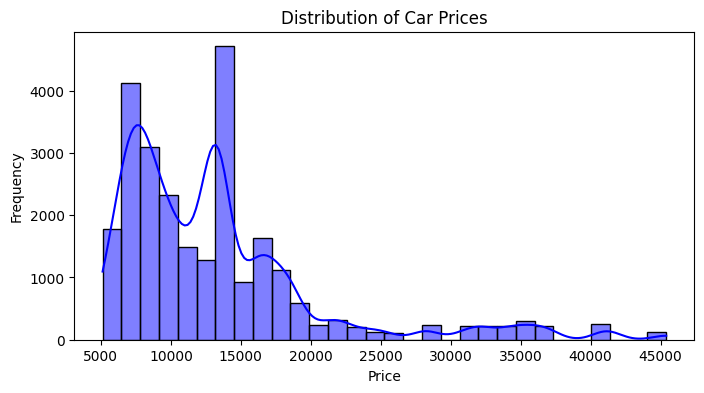

In [14]:
#Visualization of target variable
plt.figure(figsize=(8, 4))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [15]:
#Skewness of target variable
skewness = data['price'].skew()
print(f"Skewness of Price: {skewness}")

Skewness of Price: 1.9320099728328848


Its a **Positive Skew** (Right-Tail) as its greater than 0

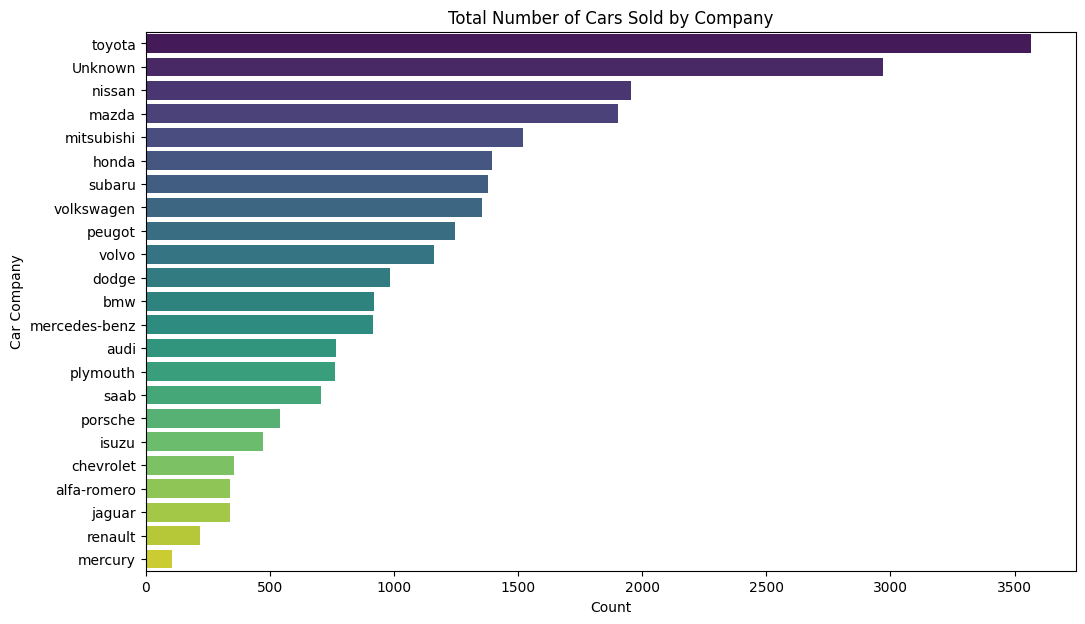

In [16]:
# Visualize 'Total numbers of cars sold by Campany' using count plot
plt.figure(figsize=(12, 7))
sns.countplot(y=data['make'], order=data['make'].value_counts().index, palette='viridis')
plt.title("Total Number of Cars Sold by Company")
plt.xlabel("Count")
plt.ylabel("Car Company")
plt.show()

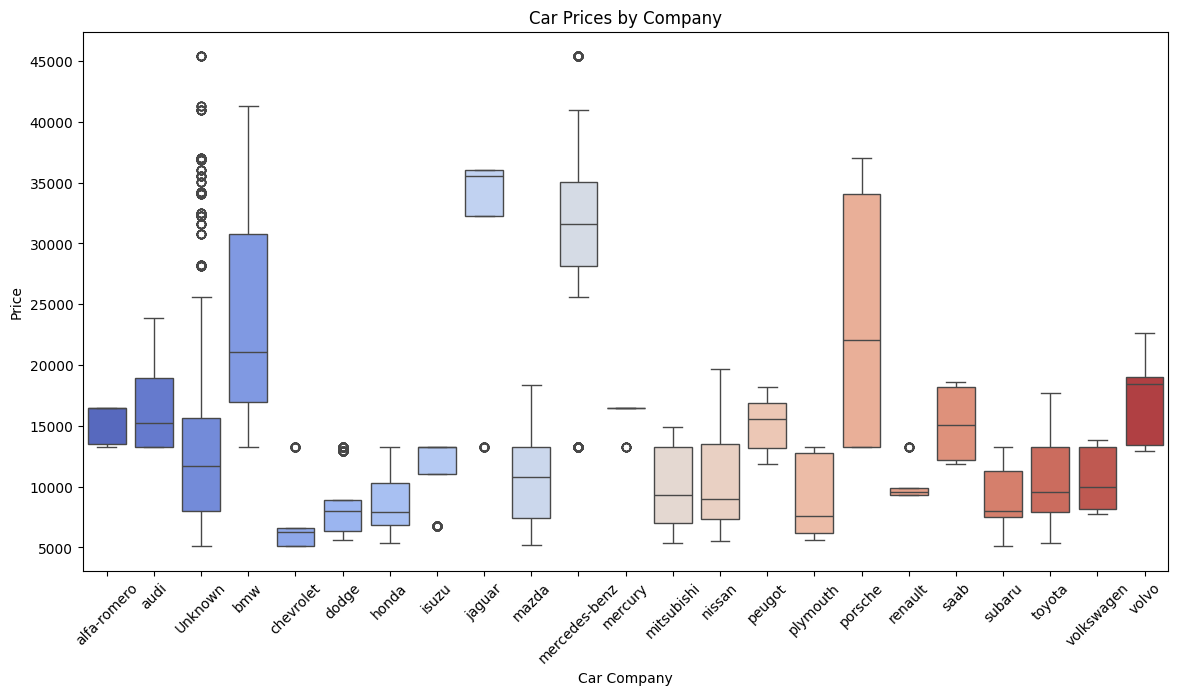

In [17]:
# Visualize 'Car Prices by Company' Using Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='make', y='price', data=data, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Car Prices by Company")
plt.xlabel("Car Company")
plt.ylabel("Price")
plt.show()

price                1.000000
engine-size          0.757708
curb-weight          0.727004
horsepower           0.664392
width                0.643282
length               0.612094
wheel-base           0.532610
bore                 0.473116
height               0.131624
normalized-losses    0.118700
stroke               0.086441
compression-ratio    0.066396
symboling           -0.084127
peak-rpm            -0.101121
city-mpg            -0.589855
highway-mpg         -0.608313
Name: price, dtype: float64


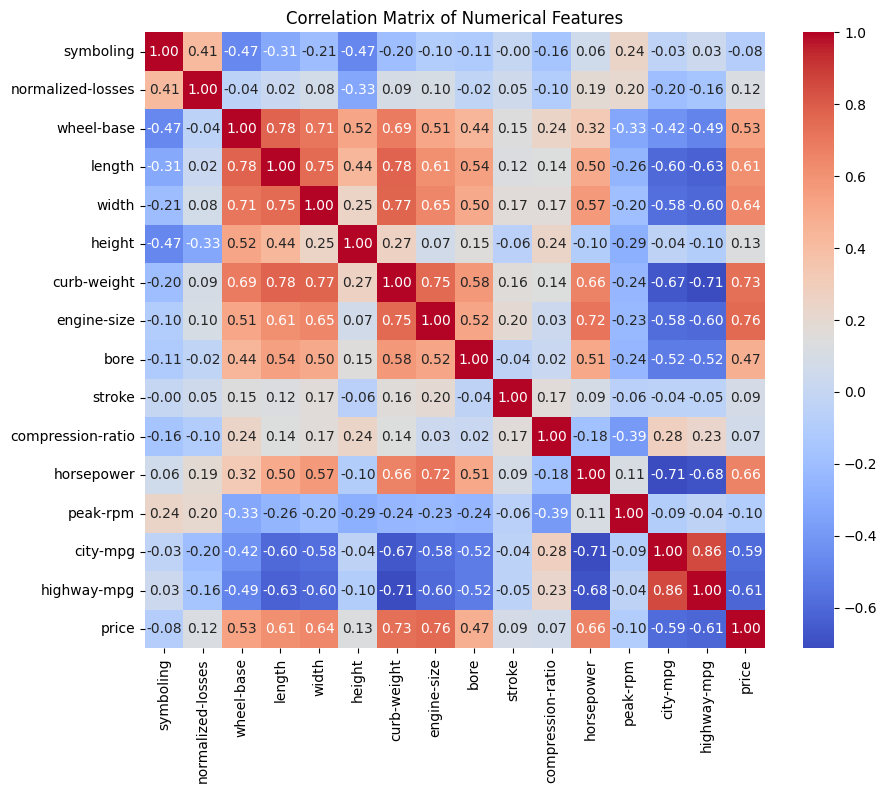

In [18]:
# Correlation Matrix
correlation_with_price = data.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation_with_price)

# Correlation Visualization using Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Task 5 - Separate the features and target variables**

In [19]:
#target variable
target = 'price'

#seperate the target(y) and features(x)
y = data[target]
x = data.drop(columns=[target])

#check the shape of x and y
print(f"shape of x: {x.shape}")
print(f"shape of y: {y.shape}")

shape of x: (25874, 25)
shape of y: (25874,)


**Task 6 - Creating Data Preprocessing Pipelines**

- Scaling the numerical columns
- Encoding the categorical columns
- Visualize the pipeline

In [33]:
# Define categorical and numerical columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

In [34]:
# Transformer for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                 # Scale the data
])

# Transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categories
])

In [36]:
# Combine transformers into a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [37]:
#print summary of pipeline
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of

In [38]:
from sklearn import set_config
set_config(display='diagram')  # Enables visual diagram
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object'))])

**Task 7 - Split the data set into train and test sets**

In [39]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Features Shape: (20699, 25)
Test Features Shape: (5175, 25)
Training Target Shape: (20699,)
Test Target Shape: (5175,)


**Task 8 - Model Building**

Train model using different Machine Learning Algorithms such as:
- Multiple Linear Regressor
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor
- Gradient Boosting Regressor


In [40]:
# Multiple Linear Regressor

from sklearn.linear_model import LinearRegression

linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [41]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


In [42]:
# K-Nearest Neighbors(KNN) Regressor

from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)


In [43]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [44]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


**Task 9 - Evaluate the model's performance using MSE and R2 score. Also compare the different model's performances based on the high accuracy achieved and low Mean Square Error.**

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate and store metrics
def evaluate_model(name, y_true, y_pred, results):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Dictionary to store results
results = {}

# Evaluate each model
evaluate_model("Linear Regression", y_test, linear_predictions, results)
evaluate_model("Decision Tree Regressor", y_test, dt_predictions, results)
evaluate_model("KNN Regressor", y_test, knn_predictions, results)
evaluate_model("Random Forest Regressor", y_test, rf_predictions, results)
evaluate_model("Gradient Boosting Regressor", y_test, gb_predictions, results)

# Print the results in a tabular format

results_df = pd.DataFrame(results).T.sort_values(by='MSE', ascending=True)
print("Model Performance Comparison:")
print(results_df)



Model Performance Comparison:
                                      MSE        R²
Gradient Boosting Regressor  8.008019e+06  0.853846
KNN Regressor                8.226880e+06  0.849851
Random Forest Regressor      9.288819e+06  0.830470
Linear Regression            1.112228e+07  0.797007
Decision Tree Regressor      1.485076e+07  0.728959


**Best Model:**

The **Gradient Boosting Regressor** is the best-performing model as it has:

The lowest Mean Squared Error (MSE): 8.008019e+06.
The highest R² score: 0.853846, indicating it explains the most variance in the target variable.

**Comparison:**

**Gradient Boosting Regressor:**

Strength: Best trade-off between accuracy and error (lowest MSE and highest R²).
Interpretability: Slightly harder to interpret due to its ensemble nature, but excellent performance.

**KNN Regressor:**

MSE: 8.226883e+06 (second lowest).
R²: 0.849851 (close to Gradient Boosting).
Interpretability: Simpler model but slightly less accurate than Gradient Boosting.

**Random Forest Regressor:**

MSE: 9.288819e+06.
R²: 0.830470.
Strength: Provides reasonable performance and interpretability but not as efficient as Gradient Boosting.

**Linear Regression:**

MSE: 1.112228e+07.
R²: 0.797007.
Strength: Highly interpretable but less accurate compared to ensemble models.

**Decision Tree Regressor:**

MSE: 1.485076e+07 (highest error).
R²: 0.728959 (lowest explained variance).
Limitation: Overfits on training data, leading to poorer generalization.

**Final Recommendation:**
The Gradient Boosting Regressor should be chosen as the most appropriate model due to its balance of accuracy (low MSE) and explained variance (high R²). It is ideal for making accurate predictions in this scenario.







### **Regression Modeling Project Report**

#### **Objective**
The primary objective of this project was to build and evaluate regression models to predict car prices using a dataset containing car-related features. We performed data preprocessing, exploratory data analysis (EDA), and model evaluation to select the best-performing regression model.

---

### **Key Steps and Reasoning**

#### **1. Data Loading**
- **Steps**:
  - The dataset was loaded into the Python environment.
  - Initial inspection of the dataset was performed using `head()` and `info()`.
- **Reasoning**: Understanding the structure of the dataset, feature types, and missing values is crucial before proceeding to further steps.

---

#### **2. Exploratory Data Analysis (EDA)**
- **Steps**:
  - Visualized the distribution of the target variable (car prices) to check for skewness.
  - Plotted the number of cars sold by different companies.
  - Examined the correlation between numerical features and the target variable using a heatmap.
- **Reasoning**: EDA helps in identifying patterns, relationships, and potential issues such as skewed distributions, which influence preprocessing and model decisions.

---

#### **3. Data Cleaning**
- **Steps**:
  - Removed duplicate rows.
  - Imputed missing values using appropriate techniques (e.g., mean/mode).
  - Checked and corrected data types of all columns.
- **Reasoning**: Clean data ensures accurate model training and reduces the risk of errors during preprocessing or modeling.

---

#### **4. Feature Engineering**
- **Steps**:
  - Separated features (independent variables) and the target variable (dependent variable).
  - Scaled numerical features to standardize their ranges.
  - Encoded categorical variables using one-hot encoding.
- **Reasoning**: Proper feature scaling and encoding improve the performance and stability of machine learning algorithms.

---

#### **5. Splitting the Dataset**
- **Steps**:
  - Split the dataset into training (80%) and testing (20%) sets using `train_test_split`.
  - Ensured reproducibility by setting a random seed.
- **Reasoning**: Splitting ensures the model is evaluated on unseen data, providing a realistic estimate of its performance.

---

#### **6. Model Building**
- **Steps**:
  - Trained five different regression models: Multiple Linear Regression, Decision Tree Regressor, KNN Regressor, Random Forest Regressor, and Gradient Boosting Regressor.
  - Integrated the preprocessing pipeline with each model for efficient data transformation and training.
- **Reasoning**: Testing multiple algorithms allows us to compare their performance and select the most suitable model for the problem.

---

#### **7. Model Evaluation**
- **Steps**:
  - Evaluated each model’s performance on the test set using:
    - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
    - **R² Score**: Indicates the proportion of variance explained by the model.
  - Compared results to identify the best-performing model.

- **Reasoning**:
  - Low MSE and high R² scores indicate better model performance.
  - Using multiple metrics ensures a comprehensive evaluation.

---

#### **8. Results and Comparison**
- **Findings**:
  - **Gradient Boosting Regressor** had the lowest MSE (8.008019e+06) and highest R² score (0.853846).
  - **KNN Regressor** and **Random Forest Regressor** also performed well but slightly lagged behind Gradient Boosting.
  - **Decision Tree Regressor** had the highest error and lowest R², indicating overfitting.

- **Conclusion**: The **Gradient Boosting Regressor** was selected as the best model due to its superior accuracy and lower error.

---

#### **9. Recommendations and Next Steps**
- **Recommendations**:
  - Deploy the Gradient Boosting Regressor model for predicting car prices.
  - Perform hyperparameter tuning to further improve its performance.

- **Next Steps**:
  - Test the model on new datasets to ensure generalizability.
  - Explore feature importance from the Gradient Boosting model to understand the most influential features.

---

This project demonstrated the importance of thorough data preprocessing, rigorous model evaluation, and the use of multiple algorithms to identify the most suitable regression model for a given dataset.

